In [20]:
from snn_200_poisson import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time
import numpy as np
import os
import multiprocessing
import numpy as np

In [69]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train[(y_train == 0)]
X_train = X_train
# y_train = y_train[:200]

print(len(X_train))

5923


In [70]:
current_time = time.time()
local_time = time.localtime(current_time)
formatted_time = time.strftime('%d_%m_%Y_%H%M%S', local_time)

dir_name = f'data_{formatted_time}'

In [15]:
model = Model(784, 100, dir_name, True, True)

In [71]:
features = model.evaluate(X_train, None)

100%|██████████| 5923/5923 [1:01:33<00:00,  1.60it/s] 


In [104]:
features[1]

array([77.14285714, 54.28571429, 54.28571429, 51.42857143, 60.        ,
       77.14285714, 71.42857143, 71.42857143, 54.28571429, 51.42857143,
       54.28571429, 54.28571429, 54.28571429, 54.28571429, 51.42857143,
       71.42857143, 51.42857143, 54.28571429, 54.28571429, 54.28571429,
       60.        , 60.        , 54.28571429, 68.57142857, 54.28571429,
       54.28571429, 51.42857143, 54.28571429, 60.        , 51.42857143,
       62.85714286, 54.28571429, 51.42857143, 54.28571429, 54.28571429,
       51.42857143, 60.        , 54.28571429, 51.42857143, 60.        ,
       51.42857143, 54.28571429, 54.28571429, 51.42857143, 51.42857143,
       51.42857143, 54.28571429, 51.42857143, 51.42857143, 54.28571429,
       51.42857143, 51.42857143, 57.14285714, 54.28571429, 51.42857143,
       54.28571429, 51.42857143, 54.28571429, 51.42857143, 51.42857143,
       51.42857143, 51.42857143, 51.42857143, 51.42857143, 54.28571429,
       54.28571429, 51.42857143, 51.42857143, 51.42857143, 48.57

In [103]:
feat_copy = features[1].copy()

sorter = np.argsort(features[1])
sorter[np.searchsorted(features[1], sort(feat_copy)[90:100], sorter=sorter)]

array([28, 28, 28, 30, 23,  7,  7,  7,  5,  5], dtype=int64)

In [100]:
sorter = np.argsort(features[0])
sorter[np.searchsorted(features[0], sort(features[0])[90:100], sorter=sorter)]

array([97, 97, 97, 97, 97, 97, 97, 97, 98, 99], dtype=int64)

In [72]:
features_reshaped = []
for i in range(features.shape[0]):
    features_reshaped.append(np.reshape(features[i], (10, 10)) / np.sum(features[i]))

array([[0.02788315, 0.02015365, 0.02118025, 0.02063006, 0.02331252,
        0.02847308, 0.0240673 , 0.02614524, 0.02041006, 0.01935989],
       [0.0198904 , 0.02118612, 0.02095493, 0.0198904 , 0.01935989,
        0.02562576, 0.0198657 , 0.01963417, 0.01873818, 0.0198904 ],
       [0.02430775, 0.02093776, 0.02015365, 0.02382244, 0.02432913,
        0.02241131, 0.02038587, 0.02041006, 0.02120083, 0.02013579],
       [0.02093576, 0.02015365, 0.02013579, 0.02090433, 0.02092971,
        0.02065544, 0.02123401, 0.02294439, 0.01935989, 0.02068135],
       [0.01935989, 0.02182957, 0.02015365, 0.01935989, 0.01935989,
        0.01907789, 0.02015365, 0.01961612, 0.0198657 , 0.02067314],
       [0.01935989, 0.01961612, 0.01990131, 0.02170029, 0.01961612,
        0.02015365, 0.01961612, 0.01963417, 0.01987938, 0.01935989],
       [0.01681112, 0.01935989, 0.01961612, 0.01907789, 0.02067314,
        0.0198904 , 0.01935989, 0.01909644, 0.01935989, 0.01787346],
       [0.01935989, 0.0184878 , 0.0193069

In [73]:
import functools

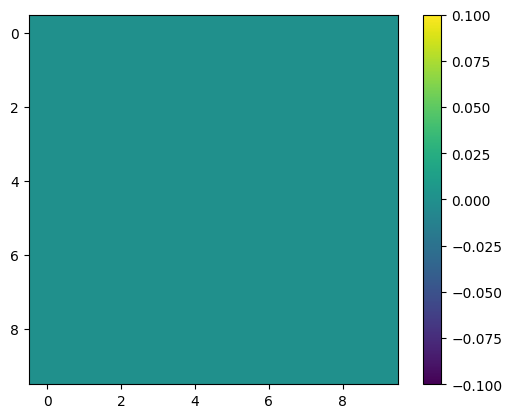

In [74]:
plt.colorbar(plt.imshow(functools.reduce(lambda x, y: x*y, features_reshaped)))

In [80]:
m = functools.reduce(lambda x, y: x*y, features_reshaped)
print(m ** (1 / 5923))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


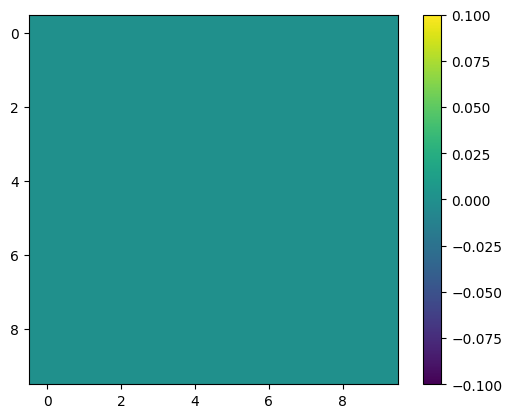

In [76]:
plt.colorbar(plt.imshow(m ** (1/50)))

In [49]:
(features_reshaped[0] * features_reshaped[1]) ** (-0.5)

array([[ 88.87270384,  80.38838529,  77.8164983 ,  71.03641911,
         90.87009265,  93.00850504,  95.17326378, 100.61605901,
         88.23561531,  71.03641911],
       [ 72.56425882,  86.10914342,  92.76342292,  69.60119199,
         82.02579139,  95.3053572 ,  71.03641911,  97.78123333,
         95.3053572 ,  81.35890397],
       [100.61605901, 100.61605901,  97.78123333,  97.78123333,
        100.61605901, 100.61605901,  90.52783119,  97.78123333,
         97.78123333,  95.3053572 ],
       [ 95.3053572 ,  97.78123333,  90.41460059,  95.3053572 ,
        100.61605901,  97.78123333,  88.23561531, 100.61605901,
         97.78123333, 100.61605901],
       [ 97.78123333, 100.61605901,  97.78123333,  97.78123333,
        100.61605901, 100.61605901, 100.61605901,  97.78123333,
         97.78123333, 100.61605901],
       [100.61605901,  97.78123333,  95.3053572 , 100.61605901,
        100.61605901, 100.61605901, 103.71265974,  95.3053572 ,
        100.61605901, 100.61605901],
       [19

In [35]:
functools.reduce(lambda x, y: x*y, features_reshaped)

array([[3.53777450e-095, 1.04486526e-099, 3.08580347e-098,
        4.83156101e-098, 5.27326663e-097, 6.40902449e-095,
        1.44571284e-096, 1.66996084e-095, 9.87392380e-099,
        1.14151915e-100],
       [2.14745994e-099, 1.38850731e-098, 2.05191814e-098,
        4.93435246e-099, 1.30086944e-100, 8.52359497e-098,
        1.08067223e-099, 8.42746490e-100, 6.47276615e-100,
        9.02980351e-100],
       [4.16901425e-097, 2.48362655e-097, 6.86112183e-100,
        2.49410098e-097, 5.11283014e-096, 1.85823973e-098,
        2.09653627e-099, 3.51843014e-099, 1.98619955e-099,
        1.72519572e-099],
       [4.69063732e-100, 5.77347137e-100, 3.21167713e-100,
        3.64561296e-100, 6.12320697e-100, 2.58194390e-101,
        4.62393700e-099, 6.03773856e-100, 1.14650481e-101,
        9.91481470e-100],
       [4.11937874e-100, 1.95139777e-100, 1.66240316e-101,
        5.57323019e-102, 4.97208990e-100, 6.81144804e-101,
        7.47180543e-101, 1.74839865e-100, 5.71585252e-101,
        1.6

In [22]:
a = np.array([[0, 1], [2, 3]])

b = np.array([[0, 1], [2, 3]])

print(a*b)

[[0 1]
 [4 9]]
